---

## S1. Linear regression model 분석

S1에서는 2차원 평면 상의 데이터에 대하여 해당 데이터를 잘 표현할 수 있는 선형 회귀 모델(Linear Regression Model)을 학습하고 평가합니다.

### 1-1) Import packages


In [1]:
from random import random as rand
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1-2) Loading the Dataset


In [2]:
# Random seed
random.seed(1234)

# Generate 2-dimensional data points
X = [rand() * i * 0.5 - 20 for i in range(0, 100)]
y = [x ** 3 * 0.002 - x ** 2 * 0.005 + x * 0.003 + rand() * 5 for x in X]
print(len(X), len(y))

100 100


Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [3]:
# Data random shuffle
idx = list(range(len(X)))
random.shuffle(idx)

# Split data for train/test
X_train, X_test = [X[i] for i in idx[:80]], [X[i] for i in idx[80:]]
y_train, y_test = [y[i] for i in idx[:80]], [y[i] for i in idx[80:]]

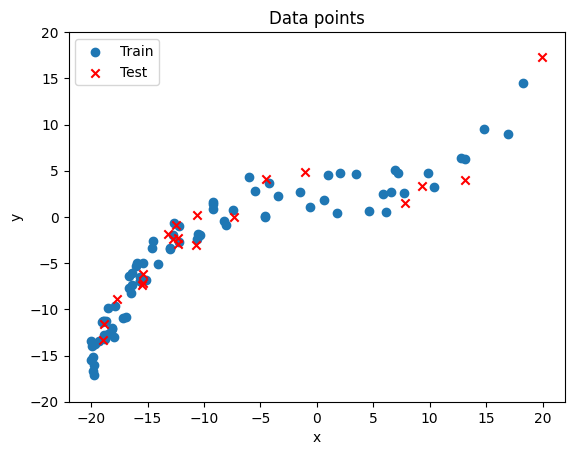

In [4]:
# 학습 데이터를 시간화해서 분포를 확인해보기
plt.scatter([i for idx, i in enumerate(X_train)], 
            [i for idx, i in enumerate(y_train)],
            label='Train', marker='o')

plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

plt.title('Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 1-3) Linear Regression Model 구현

In [5]:
import math

class Linear():
    def __init__(self):
        self.weight = rand() # Random initialization
        self.bias = 0 # initialization
        self.lr = 5e-4
        
    def forward(self, x):
        # To compute the weighted sum of Linear regression model
        prediction = self.weight * x  + self.bias
        return prediction
        
    def backward(self, x, y):
        # To compute the prediction error (derivative of L=1/2 * (prediction - y)^2 by prediction)
        pred = self.forward(x) 
        errors = pred - y
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs): # epochs 만큼 학습
            for i in range(len(y)):# Each data point (Online learning)
                x_, y_ = x[i], y[i]
                
                # To calculate gradient of the model by the sample
                errors = self.backward(x_, y_)
                gradient = errors * x_
                
                # To update the weight and bias with backward() 
                self.weight -= gradient * self.lr
                self.bias -= errors * self.lr
                
    def evaluate(self, x):
        # To compute the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type
    

### 1-4) 학습 및 결과 시각화


In [6]:
# Define a model
linear = Linear()  #  위에서 구현한 Linear regression model 모델 생성

# Training
linear.train(X_train, y_train, 100)   #  100 epoch 학습

# Print weight and bias
print(f"weight: {linear.weight:0.6f}")
print(f"bias: {linear.bias:0.6f}")

weight: 0.602628
bias: 1.462181


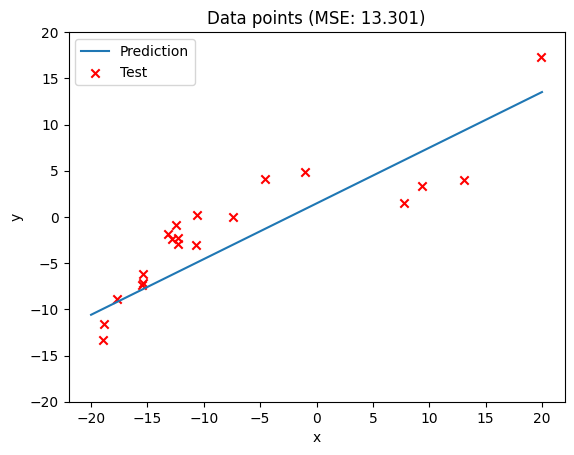

In [7]:
# Range of X
x = np.linspace(-20, 20, 50)

# Plotting linear
plt.plot(x, linear.forward(x), label='Prediction')

# Plotting test data points
plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

# Calculate MSE (Mean Square Error) of test data
mse = sum([(y - linear.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)

plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

## S2. Polynomial Regression Model

1차 Linear Regression Model은 1차 Polynomial Regression Model과 동일하다고 볼 수 있습니다. 

S2에서는 입력 파라메터에 따라 1차 이상의 차수를 가진 Polynomial Regression Model을 반환하는 `Polynomial` class를 구현합니다.

S1에서 작성된 `Linear` class를 참고하여 구현

### 2-1) Polynomial Regression Model 구현 <직접구현>


In [8]:
import math

class Polynomial():
    def __init__(self, dim, lr=1e-5):
        self.dim = dim
        self.weights = [rand() * 0.001 for i in range(self.dim)] # initialization with a list type
        self.bias = 2.5 # initialization
        self.lr = lr # learning rate
        
    def forward(self, x):
        # To compute the weighted sum of Polynomial regression model
        prediction = sum([self.weights[i] * (x ** (i + 1)) for i in range(self.dim)]) + self.bias# <your code>
        return prediction
        
    def backward(self, x, y):
        # To compute the prediction error (derivative of L=1/2 * (prediction - y)^2 by prediction)
        pred = self.forward(x) 
        errors = pred - y
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs): # epochs 만큼 학습
            for i in range(len(y)): # 데이터 하나씩 학습
                x_, y_ = x[i], y[i] # Each data point
                
                # To update the weights and bias with backward() 
                errors = self.backward(x_, y_)
                for j in range(len(self.weights)):
                    gradient =  errors * (x_ ** (j + 1))# <your code>
                    self.weights[j] -=  gradient * self.lr
                self.bias -= errors * self.lr
                
    def evaluate(self, x):
        # To compute the predictions with forward()
        predictions = [self.forward(x_) for x_ in x]
        return predictions # list type
    

### 2-2) 다항 회귀 모델 학습 및 결과 시각화


In [9]:
# Model define and training

# Define a model
polynomial = Polynomial(dim=2, lr=1e-5)  #  위에서 구현한 Polynomial regression model 모델 정의

# Training
polynomial.train(X_train, y_train, 100)   #  100 epoch 학습

# Print weight and bias
for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.452803
weight_2: -0.034107
bias: 2.538910


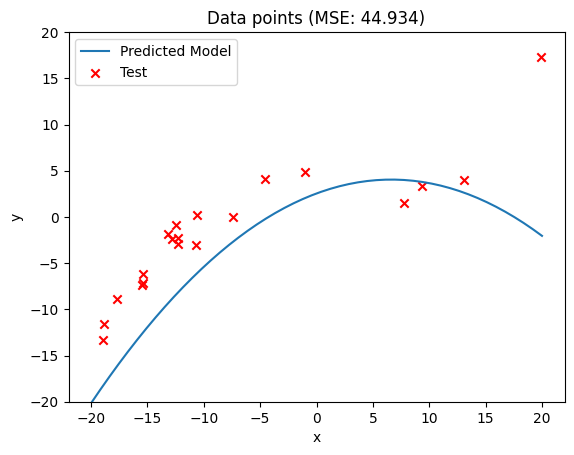

In [10]:
# Plotting polynomial and data points

# Range of X
x = np.linspace(-20, 20, 50)

# Plotting polynomial
plt.plot(x, polynomial.forward(x), label='Predicted Model')

# Plotting test data points
plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

# Calculate MSE (Mean Square Error) of test data
mse = sum([(y - polynomial.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)

plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 2-3) 다항 회귀 모델 분석 

In [20]:
# Model define and training
# <your code>

polynomial = Polynomial(dim=3, lr=1e-9)  

polynomial.train(X_train, y_train, 1000)   

for i, weight in enumerate(polynomial.weights):
    print(f"weight_{i+1}: {weight:0.6f}")
print(f"bias: {polynomial.bias:0.6f}")

weight_1: 0.000868
weight_2: -0.002663
weight_3: 0.002086
bias: 2.499982


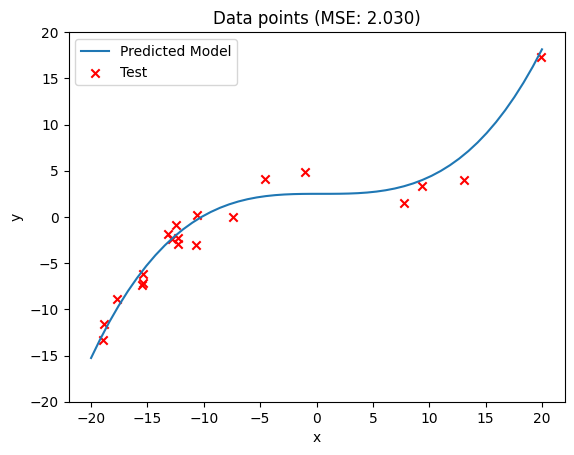

In [21]:
# Plotting polynomial and data points

x = np.linspace(-20, 20, 50)

plt.plot(x, polynomial.forward(x), label='Predicted Model')

plt.scatter([i for idx, i in enumerate(X_test)], 
            [i for idx, i in enumerate(y_test)],
            label='Test', marker='x', color='r')

mse = sum([(y - polynomial.forward(x))** 2 for x, y in zip(X_test, y_test)]) / len(X_test)

plt.title(f'Data points (MSE: {mse:0.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-20, 20])
plt.legend()
plt.show()

## S2. Discussion

**1) 본 실습에서 구현한 `Polynomial` class는 Feature Normalization을 사용하지 않았습니다.**

1. 본 실습에서의 상황을 예시로 Feature Normalization을 수행하는 방법을 설명하고,

2. 수업 시간에 배운 내용을 기반으로 Feature Normalization을 수행했을 때의 효과에 대해서 논하세요.

[답변작성]: 위 실습에서 polynomial regression을 진행하면 x, x^2, x^3에 대해 regression을 진행하는데 이때 x^n의 값이 x에 비해 매우 큰 값이다. gradient를 계산할때 x[i]를 곱하기 때문에 gradient update의 방향이 noisy해지며 converge가 느려질 수 있다. 
featur normalization에는 다향한 방법을 적용할 수 있지만, min-max scaling을 할경우 모두 [0,1]로 정규화를 할 수 있다. 
x-x_mean / x_max 으로 scaling을 진행 할 수 있다. 
이러한 스케일링을 진행하면 gradient의 update를 변수마다 일정하게 할 수 있어 converge가 빠르게 된다. 
